# <span style="color:pink">**Avaliação Intermediária Natural Language Processing 2023.1**</span>
Nicole Sarvasi Alves da Costa

Fazendo os imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import urllib
import numpy as np
from tqdm import tqdm

In [2]:
!python -m spacy download pt_core_news_sm

     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     --------------------------------------- 0.0/13.0 MB 660.6 kB/s eta 0:00:20
     ---------------------------------------- 0.1/13.0 MB 1.3 MB/s eta 0:00:10
      --------------------------------------- 0.2/13.0 MB 1.3 MB/s eta 0:00:10
      --------------------------------------- 0.3/13.0 MB 1.4 MB/s eta 0:00:09
      --------------------------------------- 0.3/13.0 MB 1.4 MB/s eta 0:00:10
     - -------------------------------------- 0.4/13.0 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.5/13.0 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.5/13.0 MB 1.4 MB/s eta 0:00:10
     - -------------------------------------- 0.6/13.0 MB 1.3 MB/s eta 0:00:10
     -- ------------------------------------- 0.7/13.0 MB 1.4 MB/s eta 0:00:10
     -- ------------------------------------- 0.8/13.0 MB 1.4 MB/s eta 0:00:09
     -- ------------------------------------- 0.8/13.0 MB 

In [3]:
import spacy
nlp = spacy.load("pt_core_news_sm")

Abrindo o dataset indicado

In [4]:
# Open csv and replace missing values with NaN
df = pd.read_csv('olist_order_reviews_dataset.csv', na_values=['', 'NA'])

Retirando colunas de id e timestamp que não serão necessárias para a análise

In [5]:
df_clean = df.drop(['review_id', 'order_id','review_creation_date','review_answer_timestamp'], axis=1)

Fazendo uma breve análise exploratória

In [6]:
filtered_df = df[df['review_comment_title'].notnull()]
filtered_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02
...,...,...,...,...,...,...,...
99192,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado!,2018-07-04 00:00:00,2018-07-05 00:25:13
99196,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"Ficamos muito satisfeitos com o produto, atend...",2018-06-30 00:00:00,2018-07-02 23:09:35
99197,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05 00:00:00,2018-06-06 10:52:19
99199,40743b46a0ee86375cedb95e82b78d75,3e93213bb8fdda91186b4018b2fe0030,5,OTIMA EMBALAGEM,NaN,2018-08-08 00:00:00,2018-08-08 16:56:16


In [7]:
count_review_message = df_clean[df_clean['review_comment_message'].notnull()].count()
count_reviw_title = df_clean[df_clean['review_comment_title'].notnull()].count()
print('Número de mensagens de reviews preenchidas:',count_review_message['review_comment_message'])
print('Número de títulos de reviews preenchidos:',count_reviw_title['review_comment_title'])

Número de mensagens de reviews preenchidas: 40977
Número de títulos de reviews preenchidos: 11568


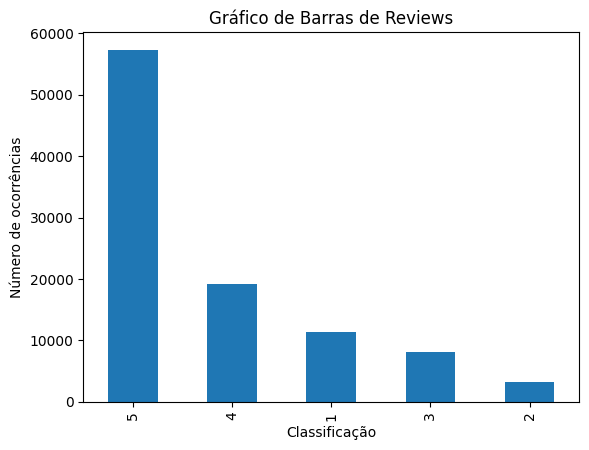

In [8]:
# contando o número de ocorrências de cada classificação
stars = df_clean['review_score'].value_counts()

# plotando um gráfico de barras com as classificações
stars.plot(kind='bar')

# adicionando rótulos aos eixos X e Y
plt.xlabel('Classificação')
plt.ylabel('Número de ocorrências')
plt.title('Gráfico de Barras de Reviews')
# exibindo o gráfico
plt.show()

Criando dataset separado para low score (1 e 2)

In [9]:
df_ = df_clean.drop(['review_comment_title'],axis=1)
df_low_filter = df_[(df_['review_score'] == 1) | (df_['review_score'] == 2)]
df_low = df_low_filter.dropna()

In [10]:
# download stopwords em português
url = "https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt"
stopwords_list = urllib.request.urlopen(url).read().decode()
stopwords = set(stopwords_list.split())

Fazendo a lemmatização das mensagens de reviews com ranking baixo 

In [11]:
low = df_low['review_comment_message']

In [12]:
reviews_low = [s for s in low]
for n in tqdm(range (len(reviews_low))):
    doc = nlp(reviews_low[n])  # process the text with Spacy
    reviews_low[n] = " ".join([token.lemma_ for token in doc])

100%|██████████| 10890/10890 [04:44<00:00, 38.29it/s]


Gráfico da probabilidade de aparição das palavras dentro das mensagens de reviews com score baixo

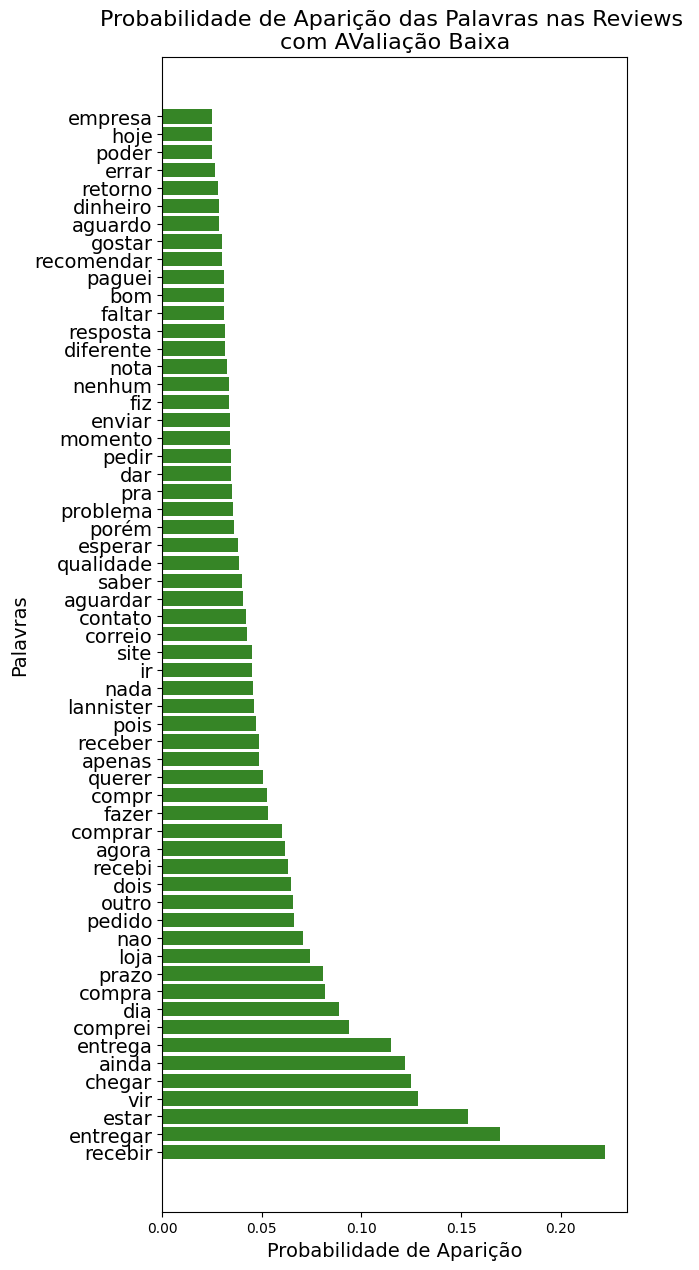

In [13]:
# Cálculo da probabilidade
vectorizer = CountVectorizer(stop_words=list(stopwords),binary=True)
x = vectorizer.fit_transform(reviews_low).todense()
x = np.mean(x, axis=0)

# Ordena as tuplas e separa
tuplas = [ (x[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True)
palavras_high = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 60
eixo_y = np.arange(n_palavras)
plt.figure(figsize=(6, 15))

# colocando [1:n_palavras] para retirar a mais provável (produto) e melhorar a visualização do gráfico
plt.barh(eixo_y[1:n_palavras], contagens[1:n_palavras], align='center', color='#368526')
plt.yticks(eixo_y[1:n_palavras], palavras_high[1:n_palavras], fontsize=14)

# add x and y labels
plt.xlabel('Probabilidade de Aparição', fontsize=14)
plt.ylabel('Palavras', fontsize=14)
plt.title('Probabilidade de Aparição das Palavras nas Reviews \ncom AValiação Baixa',fontsize=16)
plt.show()


Repetindo o processo para os títulos das reviews com score baixo

In [14]:
df_title = df_clean.drop(['review_comment_message'],axis=1)
df_low_title_filter = df_title[(df_title['review_score'] == 1) | (df_title['review_score'] == 2)]
df_low_tiltle = df_low_title_filter.dropna()

Fazendo a lemmatização

In [15]:
reviews_low_title = [s for s in df_low_tiltle['review_comment_title']]
for n in tqdm(range (len(reviews_low_title))):
    doc = nlp(reviews_low_title[n])  # process the text with Spacy
    reviews_low_title[n] = " ".join([token.lemma_ for token in doc])

100%|██████████| 2351/2351 [00:56<00:00, 41.60it/s]


Gráfico da probabilidade de aparição das palavras dentro dos títulos de reviews com score baixo

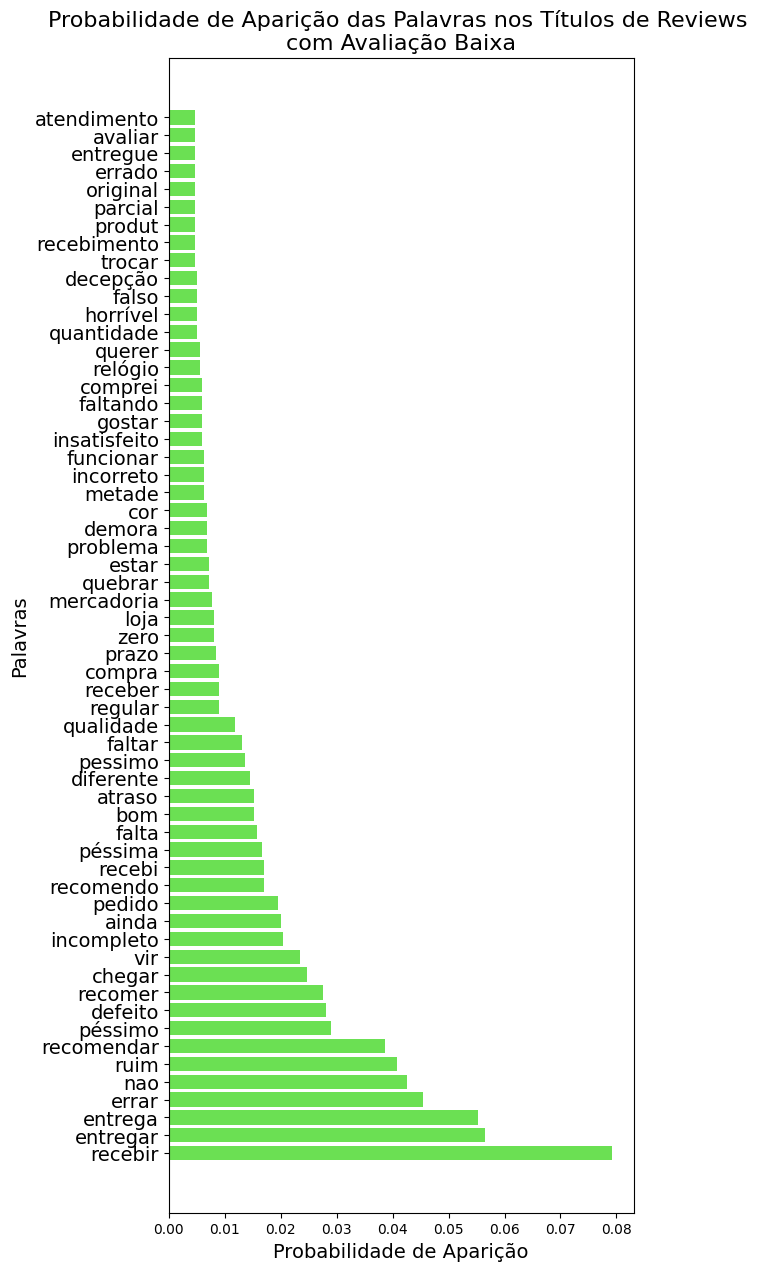

In [16]:
# Cálculo da probabilidade
vectorizer = CountVectorizer(stop_words=list(stopwords),binary=True)
x = vectorizer.fit_transform(reviews_low_title).todense()
x = np.mean(x, axis=0)

# Ordena as tuplas e separa
tuplas = [ (x[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True)
palavras_high = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 60
eixo_y = np.arange(n_palavras)
plt.figure(figsize=(6, 15))

# colocando [1:n_palavras] para retirar a mais provável (produto) e melhorar a visualização do gráfico
plt.barh(eixo_y[1:n_palavras], contagens[1:n_palavras],color='#6be053')
plt.yticks(eixo_y[1:n_palavras], palavras_high[1:n_palavras],fontsize = 14)

# add x and y labels
plt.xlabel('Probabilidade de Aparição', fontsize=14)
plt.ylabel('Palavras', fontsize=14)
plt.title('Probabilidade de Aparição das Palavras nos Títulos de Reviews \ncom Avaliação Baixa',fontsize=16)
plt.show()

Printando alguns títulos de reviews com algumas palavras que apareceram nas mais prováveis

In [17]:
list_reviews_low = list(reviews_low_title)[:500]
relevant_words = ['entregar','errar','péssimo','defeito','incompleto','qualidade','parcial','atendimento']

printed_phrases = set()
max_phrases_per_word = 5
counter = {word: 0 for word in relevant_words}

for phrase in list_reviews_low:
    for word in relevant_words:
        if word in phrase and phrase not in printed_phrases and counter[word] < max_phrases_per_word:
            printed_phrases.add(phrase)
            counter[word] += 1
            print(phrase)
            break

qualidade ruim !
descrição de o produto errar
não entregar em o tempo .
Produto errar
defeito
Mercadoria não entregar
produto errar
péssimo atendimento
produto com defeito
Recebi o produto errar
qualidade mau que camelô
Mercadoria errar
péssimo
nao entregar
Produto não entregar
Pedido não entregar
carregador com defeito
chegar parcial .
produto estar com defeito
produto de qualidade ruim
Baixa qualidade
horrivel sem qualidade
produto péssimo
produto com defeito !
produto incompleto
entrega incompleto
Insatisfação parcial
péssimo .
pessimo atendimento
Recebi , estar incompleto
produto parcialmente entr
Pedido vir incompleto
Pedido entre parcial
Produto chegar incompleto
